# MATH 360 Worksheet 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Learning Goals

* Apply the energy balance equation to global climate models
* Describe, in general terms, basic concepts in climate science such as heat capacity, thermal radiation, solar constant, albedo, black body, Stefan-Boltzmann law, and greenhouse effect.

## Prereading Activities

* Chapter 2: Earth's Energy Budget (in [Mathematics and Climate](https://epubs.siam.org/doi/10.1137/1.9781611972610) by Kaper and Engler)
* [MATH 360 > Heat Transfer](https://ubcmath.github.io/MATH360/deterministic/heat/index.html) including:
  * [Energy Balance](https://ubcmath.github.io/MATH360/deterministic/heat/balance.html)
  * [Thermal Radiation](https://ubcmath.github.io/MATH360/deterministic/heat/radiation.html)
  * [Global Energy Balance](https://ubcmath.github.io/MATH360/deterministic/heat/climate.html)

## Heat Capacity

Describe **heat capacity** in your own words.

Which has a *larger* heat capacity: air or water? Try to answer the question without searching the web.

Google it! Were you correct? If not, try to articulate your misconception.

## Energy Balance Equation

What is the **energy balance equation** and how do we use it to construct mathematical models?

Think of an example where heat is flowing through a system. Write a problem statement to describe the example.

## Radiation

What is **thermal radiation** and how is it different from **conduction** or **convection**? If you don't have much experience with heat transfer, search the internet for an explanation that makes sense to you.

What is the **solar constant** and what are its units and dimensions?

What is **albedo**? If the Earth was completely covered in snow and ice, would you expect the albedo to be higher or lower compared to what it is today?

What is the **Stefan–Boltzmann law** and how do we use it to contruct mathematical models of heat transfer?

## Temperature Dependent Albedo

The Earth's albedo depends on how much snow and ice cover the Earth. Global temperature below freezing would increase the amount of snow and ice which reflect more solar radiation therefore let us assume that the albedo varies with temperature according to the function:

$$
\alpha = \left\{ \begin{array}{ccc} 0.6 & , & T \leq 255 \\ 0.6 - (0.4/35)(T - 255) & , & 255 \leq T \leq 290 \\ 0.2 & , & T \geq 290 \end{array} \right.
$$

Construct a mathematical model of global temperature with albedo $\alpha(T)$, apply the nondimensionalization procedure, visualize the results, and classify the steady states.

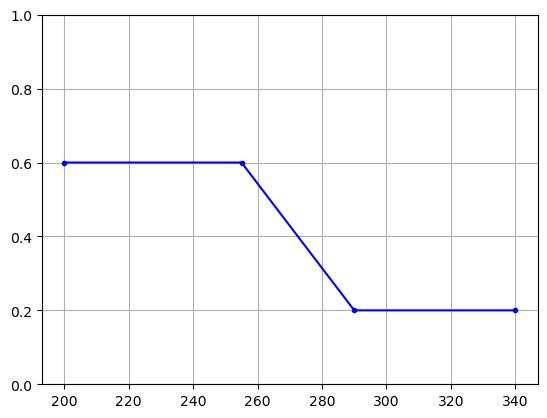

In [ ]:
temp = [200,255,290,340]
albedo = [0.6,0.6,0.2,0.2]
plt.plot(temp,albedo,'b.-'), plt.ylim([0,1]), plt.grid(True)
plt.show()

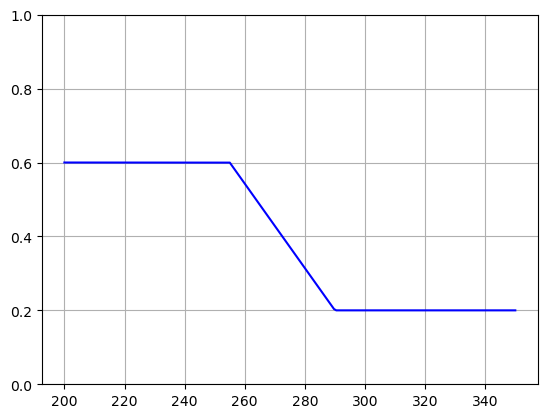

In [4]:
def alpha(T):
    if T <= 255:
        return 0.6
    elif T >= 290:
        return 0.2
    else:
        return 0.6 - 0.4/35*(T - 255)

alpha = np.vectorize(alpha)
T = np.linspace(200,350,200)
plt.plot(T,alpha(T),'b'), plt.ylim([0,1]), plt.grid(True)
plt.show()

#### Solution

\begin{align*}
C \frac{dT}{dt} &= (1 - \alpha(T)) \pi R^2 S_0 - 4 \pi R^2 \sigma \varepsilon T^4 \\
C \frac{[T]}{[t]} \frac{dT^*}{dt^*} &= (1 - \alpha([T]T^*)) \pi R^2 S_0 - 4 \pi R^2 \sigma \varepsilon [T]^4 T^{*4} \\
\frac{C}{4 \pi R^2 \sigma \varepsilon [T]^3[t]} \frac{dT^*}{dt^*} &= \frac{S_0}{4 \sigma \varepsilon [T]^4} (1 - \alpha([T]T^*)) - T^{*4}
\end{align*}

$$
[T] = \left( \frac{S_0}{4 \sigma \varepsilon} \right)^{1/4}
\hspace{10mm}
[t] = \frac{C}{4 \pi R^2 \sigma \varepsilon [T]^3} = \frac{C}{4 \pi R^2 \sigma \varepsilon} \left( \frac{4 \sigma \varepsilon}{S_0} \right)^{3/4}
$$

$$
\frac{dT^*}{dt^*} = 1 - \alpha \left( [T]T^* \right) - T^{*4}
$$

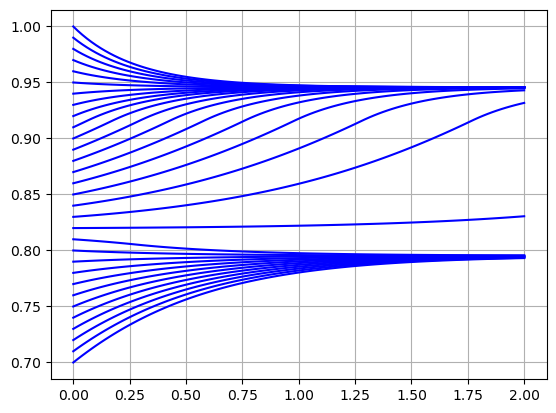

In [5]:
S0 = 1368
sigma = 5.670374419e-8
eps = 0.6
Tscale = (S0/4/sigma/eps)**0.25
f = lambda T,t: 1 - alpha(Tscale*T) - T**4
t = np.linspace(0,2,100)

for T0 in np.arange(0.7,1.,0.01):
    T = spi.odeint(f,T0,t)
    plt.plot(t,T,'b')

plt.grid(True)
plt.show()